In [76]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings. filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [127]:
train_data_all=pd.read_csv("DailyDelhiClimateTrain.csv")
test_data_all=pd.read_csv("DailyDelhiClimateTest.csv")
train_data_all.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [128]:
train_data_all.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [132]:
train_data_all['date']= pd.to_datetime(train_data_all['date'])
train_data_all=train_data_all.set_index(train_data_all['date'])
test_data_all['date']= pd.to_datetime(test_data_all['date'])
test_data_all=test_data_all.set_index(test_data_all['date'])

In [178]:
test_data_all_weekly=test_data_all.resample('W').mean()
train_data_all_weekly=train_data_all.resample('W').mean()

# Univariate Forecasting 

In [179]:
test_data=test_data_all_weekly['Date' and 'meantemp']
train_data=train_data_all_weekly['Date' and 'meantemp']

In [180]:
train_data.head()

date
2013-01-06     7.705556
2013-01-13    12.343537
2013-01-20    13.642857
2013-01-27    12.329592
2013-02-03    15.736905
Freq: W-SUN, Name: meantemp, dtype: float64

In [181]:
len(train_data)

209

There are 1462 values in the dataset

In [182]:
len(test_data)

18

There are 114 values in the test data

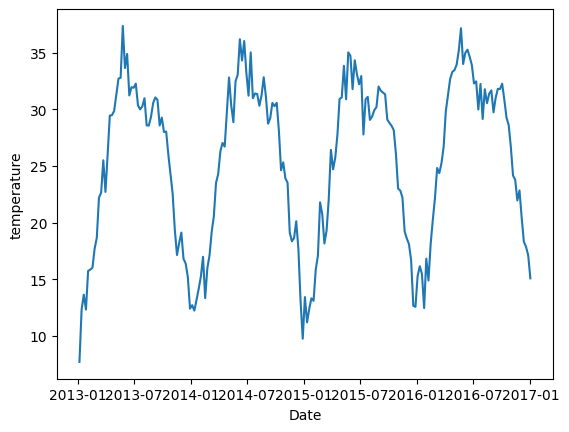

In [183]:
plt.plot(figsize=(12,8))
plt.plot(train_data)
plt.xlabel("Date")
plt.ylabel("temperature")
plt.show()

As we can clearly see it from the graph, the series is not stationary

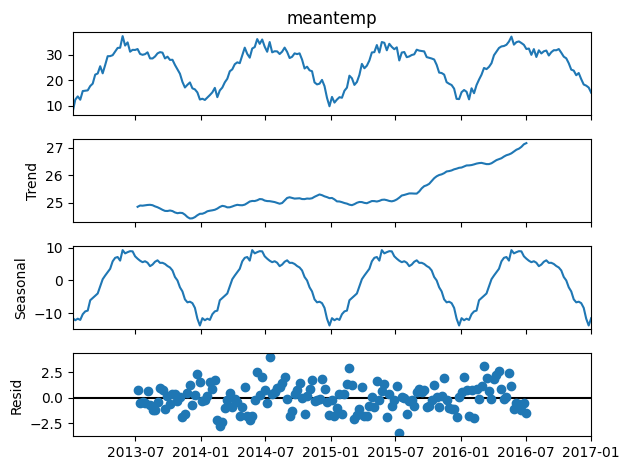

In [184]:
res=seasonal_decompose(train_data,model='additive')
res.plot()
plt.show()

## Checking Stationarity

In [185]:
def ADF_Test(series):
    result = adfuller(series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [187]:
ADF_Test(train_data)

ADF Statistic: -4.745758
p-value: 0.000069
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


Series is stationary as p-value is below 0.05

In [170]:
# data_diff=train_data.diff().dropna()

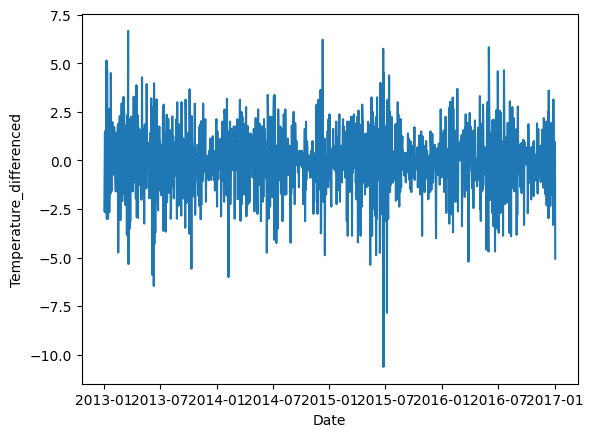

In [171]:
# plt.plot(figsize=(12,8))
# plt.plot(data_diff)
# plt.xlabel("Date")
# plt.ylabel("Temperature_differenced")
# plt.show()

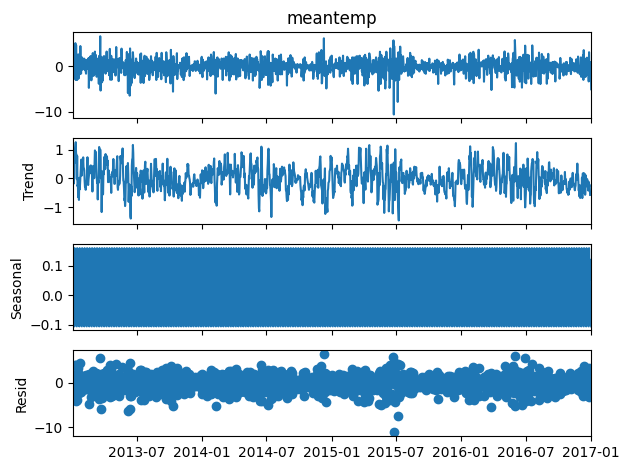

In [172]:
# res_1=seasonal_decompose(data_diff,model='additive')
# res_1.plot()
# plt.show()

In [174]:
# ADF_Test(data_diff)

ADF Statistic: -16.378720
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


We have made the series stationary by using differencing method

## Plotting ACF and PACF

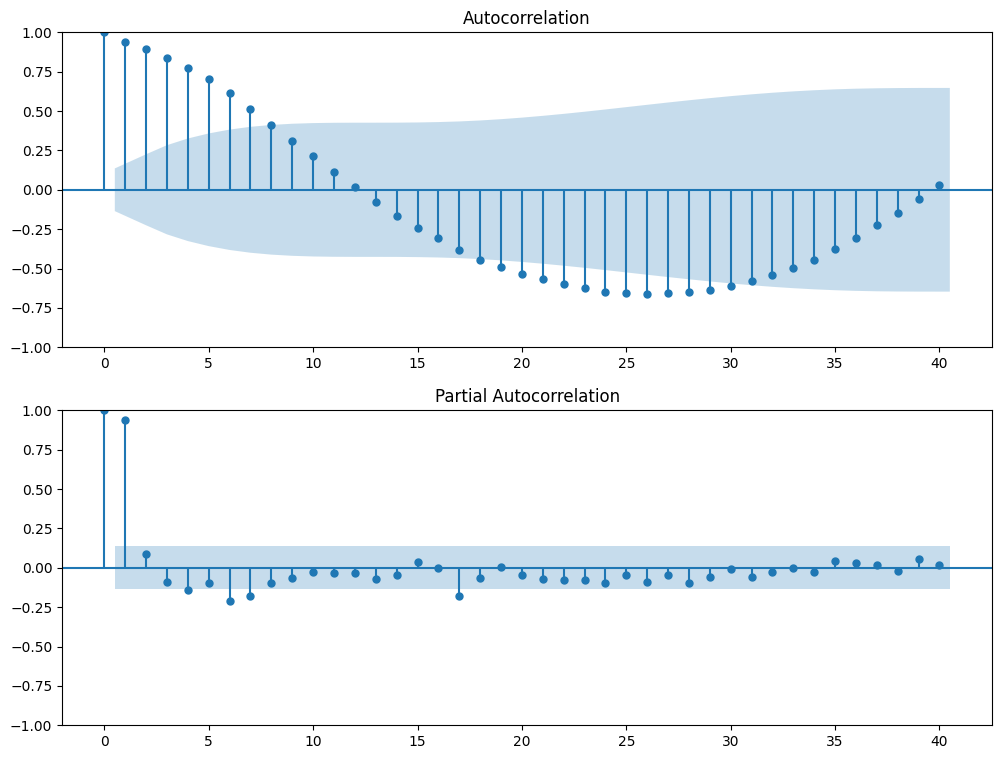

In [188]:
fig=plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = plot_acf(train_data, lags=40, fft=True, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train_data, lags=40,ax=ax2)

p=1 2 3 4 5 6 7 19 20 21 - 28,  q=1 6 7 17 -- looks like they are the suitable lags

## Training ARIMA and tuning the hyperparameters

In [219]:
P_values=[1,2,3,4,5,6,7,19,20,21,22,23,24,25]
Q_values=[1,6,7,17]
fitted_model_dict = {}
for ar_order in P_values:
    for ma_order in Q_values:
        # Create ARMA(p,q) model
        arma_model = ARIMA(train_data, order=(ar_order, 0, ma_order))
        arma_model_fit = arma_model.fit()
        fitted_model_dict[(ar_order, ma_order)] = arma_model_fit
        print(f'ARMA({ar_order},{ma_order}) - AIC: {arma_model_fit.aic}, BIC: {arma_model_fit.bic}')

ARMA(1,1) - AIC: 901.7744278289003, BIC: 915.1437648367596
ARMA(1,6) - AIC: 880.4705202291508, BIC: 910.5515284968341
ARMA(1,7) - AIC: 879.9945641391688, BIC: 913.417906658817
ARMA(1,17) - AIC: 884.4139400977014, BIC: 951.2606251369975
ARMA(2,1) - AIC: 902.7844438741458, BIC: 919.4961151339699
ARMA(2,6) - AIC: 853.6094952787292, BIC: 887.0328377983774
ARMA(2,7) - AIC: 855.5576912568442, BIC: 892.3233680284571
ARMA(2,17) - AIC: 869.1879524295916, BIC: 939.3769717208527
ARMA(3,1) - AIC: 859.0080263358341, BIC: 879.062031847623
ARMA(3,6) - AIC: 855.5736024235523, BIC: 892.3392791951652
ARMA(3,7) - AIC: 857.6079775009654, BIC: 897.7159885245431
ARMA(3,17) - AIC: 864.8409569676057, BIC: 938.3723105108315
ARMA(4,1) - AIC: 858.7479534623625, BIC: 882.1442932261161
ARMA(4,6) - AIC: 857.6104090182924, BIC: 897.7184200418702
ARMA(4,7) - AIC: 859.5600506185239, BIC: 903.0103958940664
ARMA(4,17) - AIC: 877.3777462792057, BIC: 954.2514340743963
ARMA(5,1) - AIC: 858.8172662666668, BIC: 885.555940282

In [285]:
best_model=fitted_model_dict[(2,6)]

In [268]:
# test_data_diff=test_data.diff()
start=len(train_data)
end=len(train_data)+ len(test_data)-1
pred=best_model.predict(start='2017-01-01',end='2017-04-30',type='levels')

In [269]:
test_data.head()

date
2017-01-01    15.913043
2017-01-08    17.487247
2017-01-15    13.191727
2017-01-22    14.732486
2017-01-29    17.239193
Freq: W-SUN, Name: meantemp, dtype: float64

In [270]:
# test_data.tail()
len(test_data)

18

In [271]:
weekly_pred = pred.resample('W').mean()

In [272]:
# weekly_pred.index=test_data.index[start:end+1]

In [273]:
weekly_pred

2017-01-01    16.699705
2017-01-08    14.880740
2017-01-15    14.281506
2017-01-22    14.064362
2017-01-29    13.867623
2017-02-05    13.532594
2017-02-12    13.703736
2017-02-19    14.038575
2017-02-26    14.529510
2017-03-05    15.166819
2017-03-12    15.938826
2017-03-19    16.832110
2017-03-26    17.831723
2017-04-02    18.921436
2017-04-09    20.083991
2017-04-16    21.301371
2017-04-23    22.555069
2017-04-30    23.826369
Freq: W-SUN, Name: predicted_mean, dtype: float64

<Axes: xlabel='date'>

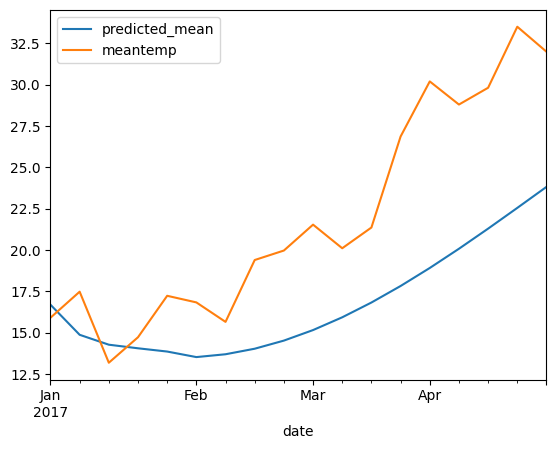

In [274]:
weekly_pred.plot(legend=True)
test_data.plot(legend=True)

In [275]:
def metrics(y_act,y_pred):
    mae = mean_absolute_error(y_act, y_pred)
    return mae;

In [276]:
metrics(test_data,weekly_pred)

5.354341098616205

## SARIMAX

In [247]:
sarima = ARIMA(train_data,order=(2,0,6), seasonal_order=(2,0,1,12),
                                 enforce_stationarity=False, enforce_invertibility=False,)

In [231]:
fitted = sarima.fit()
print(fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           meantemp   No. Observations:                  209
Model:             ARIMA(2, 0, 6)x(2, 0, [1], 12)   Log Likelihood                -358.382
Date:                            Wed, 19 Jun 2024   AIC                            742.765
Time:                                    19:31:48   BIC                            784.488
Sample:                                01-06-2013   HQIC                           759.677
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4563      0.343     74.151      0.000      24.783      26.129
ar.L1          1.9660      0.017   

In [235]:
start=len(train_data)
end=len(train_data)+ len(test_data)-1
pred_1=fitted.predict(start='2017-01-01',end='2017-04-30',type='levels')
weekly_pred_1 = pred_1.resample('W').mean()

<Axes: xlabel='date'>

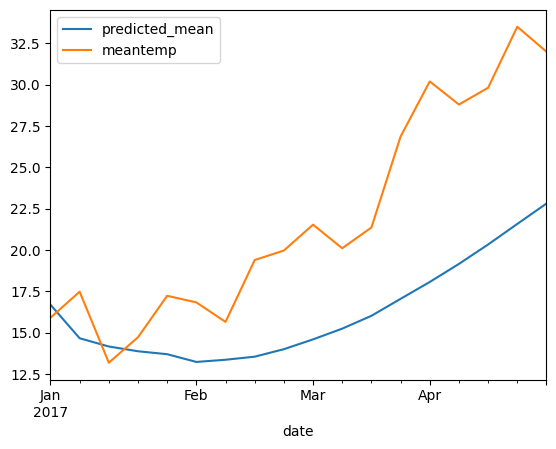

In [236]:
weekly_pred_1.plot(legend=True)
test_data.plot(legend=True)

In [237]:
metrics(test_data,weekly_pred_1)

5.887174073582782

## Auto tuning

In [239]:
from pmdarima import auto_arima

In [241]:
sarima_model = auto_arima(train_data, start_p=0, start_q=0,
                      max_p=30, max_q=30,
                      m=12,             
                      d=None,             
                      start_P=1,
                      start_Q=1,
                      max_P=10,
                      max_Q=10,
                      test='adf',         
                      D=None, 
                      seasonal=True,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False,
                         information_criterion='aic')

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1422.446, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1418.852, Time=0.32 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(0,0,0)(0,0,4)[12] intercept   : AIC=inf, Time=6.09 sec
 ARIMA(0,0,0)(0,0,5)[12] intercept   : AIC=inf, Time=9.52 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1424.377, Time=0.14 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1415.519, Time=0.18 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1340.866, Time=4.10 sec
 ARIMA(0,0,0)(1,0,4)[12] intercept   : AIC=inf, Time=7.30 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1282.757, Time=0.91 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1246.106, Time=1.18 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1302.598, Time=2.34 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=5.18 sec
 ARIMA(0,0,0)(3,0,0)[12] inter

In [246]:
sarima_1 = ARIMA(train_data,order=(4,0,1), seasonal_order=(0,0,0,12),)

In [248]:
fitted_1 = sarima_1.fit()
print(fitted_1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           meantemp   No. Observations:                  209
Model:             ARIMA(2, 0, 6)x(2, 0, [1], 12)   Log Likelihood                -358.382
Date:                            Wed, 19 Jun 2024   AIC                            742.765
Time:                                    19:59:38   BIC                            784.488
Sample:                                01-06-2013   HQIC                           759.677
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4563      0.343     74.151      0.000      24.783      26.129
ar.L1          1.9660      0.017   

In [249]:
start=len(train_data)
end=len(train_data)+ len(test_data)-1
pred_2=fitted_1.predict(start='2017-01-01',end='2017-04-30',type='levels')
weekly_pred_2 = pred_2.resample('W').mean()

<Axes: xlabel='date'>

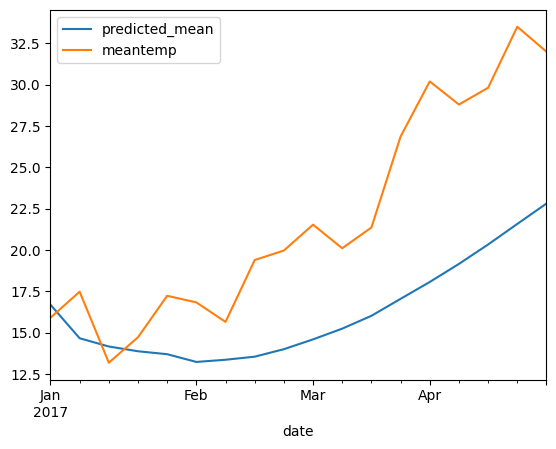

In [250]:
weekly_pred_2.plot(legend=True)
test_data.plot(legend=True)

In [251]:
metrics(test_data,weekly_pred_2)

5.887174073582782

ARMA(2,6) is the best model

## Forcasting with the best model

In [297]:
forecast_steps = 6
forecast = best_model.predict(start='2017-04-30',end='2017-06-30',type='levels')

In [298]:
forecast

2017-04-30    23.826369
2017-05-07    25.096615
2017-05-14    26.347481
2017-05-21    27.561231
2017-05-28    28.720964
2017-06-04    29.810844
2017-06-11    30.816311
2017-06-18    31.724270
2017-06-25    32.523256
2017-07-02    33.203570
Freq: W-SUN, Name: predicted_mean, dtype: float64

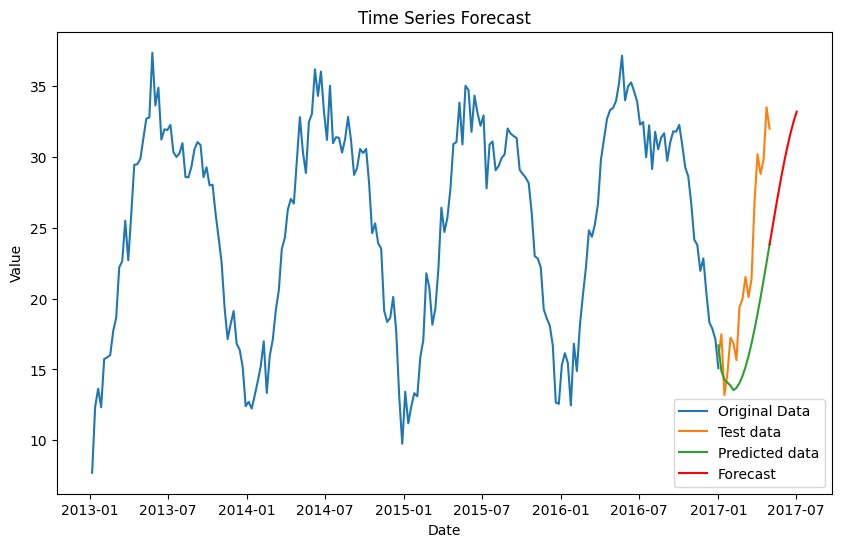

In [300]:
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Original Data')
plt.plot(test_data, label='Test data')
plt.plot(weekly_pred, label='Predicted data')
plt.plot(forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecast')
plt.legend()
plt.show()